In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Temporal Analysis (2012, 2016, 2020)

In [110]:
data = pd.read_csv("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.csv")

In [111]:
data.head()

,Unnamed: 0,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,geometry,index_right,state_2020,Latitude_2020,Longitude_2020,distances_2020,Latitude_2020_early,Longitude_2020_early,distances_2020_early,Latitude_2012,Longitude_2012,distances_2012,Latitude_2016,Longitude_2016,distances_2016,Latitude_starbucks,Longitude_starbucks,distances_starbucks,Latitude_target,Longitude_target,distances_target
0,0,167312,NORTH SHORE COMMUNITY COLLEGE,1 FERNCROFT RD,Danvers,MA,1923,0840,(978) 762-4350,1,A,6729,ESSEX,25009,USA,611210,JUNIOR COLLEGES,http://www.northshore.edu/about/locations.html,2018-05-30,IMAGERY/OTHER,2020-01-31,www.northshore.edu,5763,966,10812340,northshorecommunitycollege,2.021559e+06,677835.759714,-70.968263,42.590017,2173.00,167312.00,North Shore Community College,"Public, 2 Year",3.0,3.0,1.0,,Yes,NaN,https://www.northshore.edu/academics/civic-lea...,NaN,NaN,http://www.allinchallenge.org/wp-content/uploa...,https://allinchallenge.org/wp-content/uploads/...,NaN,-70.968044,42.590103,42,40.56%,0.16%,4.04%,10.14%,23.20%,0.14%,2.87%,POLYGON ((2021650.6643523185 678044.5063151738...,17375.0,MA,42.582524,-70.931618,2934.337676,42.562567,-70.939541,3662.994173,42.585426,-70.953166,1152.264665,42.585723,-70.984051,1138.920037,42.579005,-71.000409,2658.833799,42.552616,-70.937616,4667.018477
1,1,164924,BOSTON COLLEGE,140 COMMONWEALTH AVENUE,Chestnut Hill,MA,2467,NOT AVAILABLE,(617) 552-8000,2,A,18898,MIDDLESEX,25017,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.bc.edu/bc-web/about/maps-and-direc...,2018-05-23,IMAGERY/OTHER,2019-02-05,www.bc.edu,14720,4178,NOT AVAILABLE,bostoncollege,2.013476e+06,646479.837944,-71.166565,42.337867,2128.00,164924.00,Boston College,"Private, 4 Year",2.0,8.0,1.0,,Yes,https://allinchallenge.org/wp-content/uploads/...,https://allinchallenge.org/wp-content/uploads/...,https://allinchallenge.org/wp-content/uploads/...,NaN,NaN,https://allinchallenge.org/wp-content/uploads/...,NaN,-71.169242,42.336213,13,23.53%,0.04%,7.97%,3.88%,8.90%,0.02%,2.72%,MULTIPOLYGON (((2013718.6063427534 646406.0576...,17238.0,MA,42.345450,-71.160216,51.551991,42.352893,-71.137603,1778.460127,42.345580,-71.160190,62.438154,42.353410,-71.187882,2182.014184,42.348748,-71.159854,343.184635,42.364178,-71.156462,2052.781607
2,2,167376,NORTHERN ESSEX COMMUNITY COLLEGE,100 ELLIOTT STREET,Haverhill,MA,1830,2399,(978) 556-3000,1,A,6046,ESSEX,25009,USA,611210,JUNIOR COLLEGES,https://www.necc.mass.edu/directions-maps/,2018-05-30,IMAGERY/OTHER,2019-02-08,www.necc.mass.edu/,5233,813,NOT AVAILABLE,northernessexcommunitycollege,2.009191e+06,698116.510718,-71.046872,42.795902,2174.00,167376.00,Northern Essex Community College,"Public, 2 Year",1.0,1.0,0.0,HSI,Yes,NaN,NaN,NaN,NaN,NaN,https://allinchallenge.org/wp-content/uploads/...,NaN,-71.049040,42.796634,47,47.83%,0.14%,2.22%,4.05%,39.99%,0.26%,1.17%,POLYGON ((2009539.7716415266 698175.1657430382...,17531.0,MA,42.796735,-71.049011,0.000000,42.703313,-71.130562,12016.872208,42.796098,-71.047272,0.000000,42.792639,-71.072501,1768.051508,42.807206,-71.102071,4296.258598,42.788072,-71.115959,5346.915613
3,3,164720,BECKER COLLEGE,61 SEVER ST,Worcester,MA,1609,2165,(877) 523-2537,2,A,2256,WORCESTER,25027,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.becker.edu/admissions/visit-becker...,2018-05-22,IMAGERY/OTHER,2019-02-21,www.becker.edu,1839,417,NOT AV

### Removing Problem States for 2012 & 2016 
Geocodio mislabeled the states of certain polling places. Here we need to manually exclude those states because they don't have representative state polling place data for that year, and would severely skew our numbers.

In [112]:
data_2016 = pd.read_csv("../../00_source_data/2016_polling_data_cpi/2016_final_geocoded_geocodio_2.csv")
data_2016['State'].value_counts()

PA    6794
IL    5574
OH    4247
NJ    3271
NC    2694
WI    2559
GA    2452
KY    2352
LA    2033
OK    1789
MD    1585
IA    1531
VA    1503
WV    1341
NE    1081
MS     953
CT     640
MA     620
NM     459
SD     455
MT     375
AK     364
NH     323
DE     287
ND     246
ME     176
NY      26
TX       9
CA       7
MO       6
AR       4
TN       4
UT       3
NV       3
AL       3
WY       3
FL       3
RI       2
CO       2
VT       2
IN       2
KS       2
MN       1
SC       1
AZ       1
Name: State, dtype: int64

In [113]:
r1 = pd.read_csv("../../20_intermediate_files/10_polling_places/2012_Polling_Clean/Tier1_2012_clean_23States_geocoded.csv")
r2 = pd.read_csv("../../20_intermediate_files/10_polling_places/2012_Polling_Clean/Tier2_2012_clean_4States_geocoded.csv")
data_2012 = pd.concat([r1,r2], ignore_index=True)
data_2012['State'].value_counts()

PA    8212
IL    7228
OH    4848
MI    3530
NJ    3217
WI    3042
NC    2754
KY    2540
VA    2394
LA    2145
SC    2026
OK    1822
MD    1677
IA    1675
MS    1508
MA    1468
AR    1373
WV    1331
NE    1134
CT     703
MT     513
RI     490
ME     484
DE     314
NH     313
ND     278
AK     192
GA       8
WY       6
TN       2
IN       1
TX       1
MO       1
MN       1
NY       1
CA       1
Name: State, dtype: int64

In [114]:
#We want to exclude states with less than 100 polling places in 2012 & 2016, 
#because we cannot calculate accurate distances with so many missing polling places

accident_states_2016 = ['NY','TX','CA','MO','AR','TN','UT','NV','AL','WY','FL','RI','CO','VT','IN','KS','MN','SC','AZ']
accident_states_2012 = ['GA','WY','TN','IN','TX','MO','MN','NY','CA']
accident_states = set(accident_states_2016).union(set(accident_states_2012))
data = data[~data['STATE'].isin(accident_states)]

### Descriptive Statistics

In [115]:
data = data[(data['distances_2012'].notna()) & (data['distances_2016'].notna()) & (data['distances_2020'].notna())]
print("We have {} colleges with election day polling information for 2012, 2016, and 2020.".format(len(data)))
print("We have colleges in {} states with election day polling information for 2012, 2016, and 2020.".format(len(data['STATE'].unique())))

We have 906 colleges with election day polling information for 2012, 2016, and 2020.
We have colleges in 19 states with election day polling information for 2012, 2016, and 2020.


In [116]:
#Calculate difference in distances between years
#A positive number means the later year was farther than the earlier year
#A negative number means the later year was closer than the earlier year
data['2012_2016_difference'] = data['distances_2016'] - data['distances_2012']
data['2016_2020_difference'] = data['distances_2020'] - data['distances_2016']
data['2012_2020_difference'] = data['distances_2020'] - data['distances_2012']

(array([  1.,   0.,   3.,  58., 799.,  33.,   7.,   4.,   0.,   1.]),
 array([-17398.5815234 , -13088.01149999,  -8777.44147657,  -4466.87145315,
          -156.30142974,   4154.26859368,   8464.8386171 ,  12775.40864052,
         17085.97866393,  21396.54868735,  25707.11871077]),
 <a list of 10 Patch objects>)

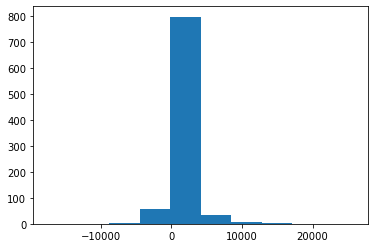

In [117]:
#We have improvements and worsening from 2012 - 2016
plt.hist(data['2012_2016_difference'])

(array([  1.,   2.,   3.,  40., 816.,  42.,   0.,   1.,   0.,   1.]),
 array([-25704.32816655, -20378.49020791, -15052.65224928,  -9726.81429064,
         -4400.976332  ,    924.86162664,   6250.69958527,  11576.53754391,
         16902.37550255,  22228.21346118,  27554.05141982]),
 <a list of 10 Patch objects>)

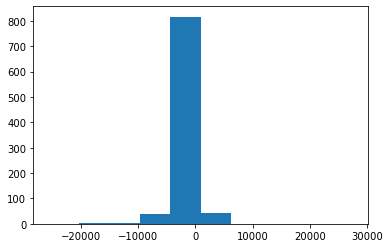

In [118]:
#We have improvements & worsening from 2016-2020
plt.hist(data['2016_2020_difference'])

(array([  1.,   0.,   8., 815.,  79.,   1.,   1.,   0.,   0.,   1.]),
 array([-17400.55191425, -12905.09158084,  -8409.63124744,  -3914.17091403,
           581.28941938,   5076.74975279,   9572.21008619,  14067.6704196 ,
         18563.13075301,  23058.59108641,  27554.05141982]),
 <a list of 10 Patch objects>)

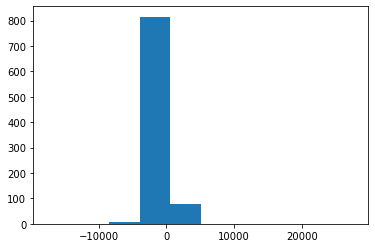

In [120]:
#We see improvements & worsening from 2012-2020
plt.hist(data['2012_2020_difference'])

### How many colleges were closer, the same distance, or farther away over time?

In [121]:
print("From 2012 to 2016, {} colleges remained the same distance from their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
== 0]), np.round(100*len(data[data['2012_2016_difference'] == 0])/len(data),2)))

print("From 2012 to 2016, {} colleges were farther from their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
> 0]), np.round(100*len(data[data['2012_2016_difference'] > 0])/len(data),2)))

print("From 2012 to 2016, {} colleges were closer to their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
< 0]), np.round(100*len(data[data['2012_2016_difference'] < 0])/len(data),2)))

From 2012 to 2016, 545 colleges remained the same distance from their election day polling place in 2016. This is 60.15 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2016, 261 colleges were farther from their election day polling place in 2016. This is 28.81 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2016, 100 colleges were closer to their election day polling place in 2016. This is 11.04 % of colleges with election day data for 2012, 2016, and 2020.


In [122]:
print("From 2016 to 2020, {} colleges remained the same distance from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
== 0]), np.round(100*len(data[data['2016_2020_difference'] == 0])/len(data),2)))

print("From 2016 to 2020, {} colleges were farther from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
> 0]), np.round(100*len(data[data['2016_2020_difference'] > 0])/len(data),2)))

print("From 2016 to 2020, {} colleges were closer to their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
< 0]), np.round(100*len(data[data['2016_2020_difference'] < 0])/len(data),2)))

From 2016 to 2020, 115 colleges remained the same distance from their election day polling place in 2020. This is 12.69 % of colleges with election day data for 2012, 2016, and 2020.
From 2016 to 2020, 353 colleges were farther from their election day polling place in 2020. This is 38.96 % of colleges with election day data for 2012, 2016, and 2020.
From 2016 to 2020, 438 colleges were closer to their election day polling place in 2020. This is 48.34 % of colleges with election day data for 2012, 2016, and 2020.


In [123]:
print("From 2012 to 2020, {} colleges remained the same distance from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
== 0]), np.round(100*len(data[data['2012_2020_difference'] == 0])/len(data),2)))

print("From 2012 to 2020, {} colleges were farther from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
> 0]), np.round(100*len(data[data['2012_2020_difference'] > 0])/len(data),2)))

print("From 2012 to 2020, {} colleges were closer to their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
< 0]), np.round(100*len(data[data['2012_2020_difference'] < 0])/len(data),2)))

From 2012 to 2020, 128 colleges remained the same distance from their election day polling place in 2020. This is 14.13 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2020, 428 colleges were farther from their election day polling place in 2020. This is 47.24 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2020, 350 colleges were closer to their election day polling place in 2020. This is 38.63 % of colleges with election day data for 2012, 2016, and 2020.


### For colleges that were closer or farther away - how far were they?

In [124]:
print("For colleges that were farther away in 2016 than they were in 2012, they were farther away by {} miles on average."\
      .format(np.round(data[data['2012_2016_difference'] > 0]['2012_2016_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2016 than they were in 2012, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2012_2016_difference'] > 0]['2012_2016_difference'].median()/1609,2)))

For colleges that were farther away in 2016 than they were in 2012, they were farther away by 1.43 miles on average.
For colleges that were farther away in 2016 than they were in 2012, they were farther away by a median of 0.6 miles.


In [125]:
print("For colleges that were farther away in 2020 than they were in 2016, they were farther away by {} miles on average."\
      .format(np.round(data[data['2016_2020_difference'] > 0]['2016_2020_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2020 than they were in 2016, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2016_2020_difference'] > 0]['2016_2020_difference'].median()/1609,2)))

For colleges that were farther away in 2020 than they were in 2016, they were farther away by 0.31 miles on average.
For colleges that were farther away in 2020 than they were in 2016, they were farther away by a median of 0.05 miles.


In [126]:
print("For colleges that were farther away in 2020 than they were in 2012, they were farther away by {} miles on average."\
      .format(np.round(data[data['2012_2020_difference'] > 0]['2012_2020_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2020 than they were in 2012, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2012_2020_difference'] > 0]['2012_2020_difference'].median()/1609,2)))

For colleges that were farther away in 2020 than they were in 2012, they were farther away by 0.29 miles on average.
For colleges that were farther away in 2020 than they were in 2012, they were farther away by a median of 0.05 miles.
